<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [11]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [12]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [13]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [14]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

# Task 1
##### box plot

<AxesSubplot:ylabel='MEDV'>

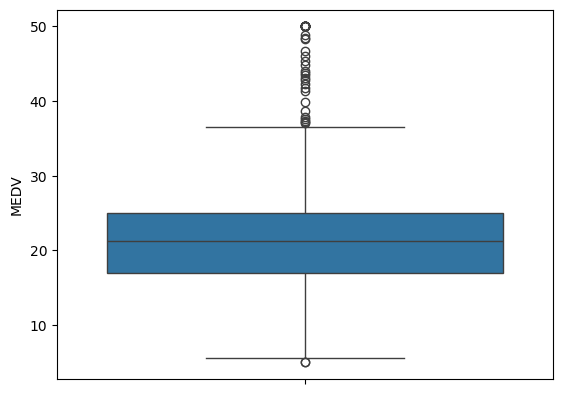

In [15]:
sns.boxplot(data = boston_df['MEDV'])

<AxesSubplot:ylabel='CHAS'>

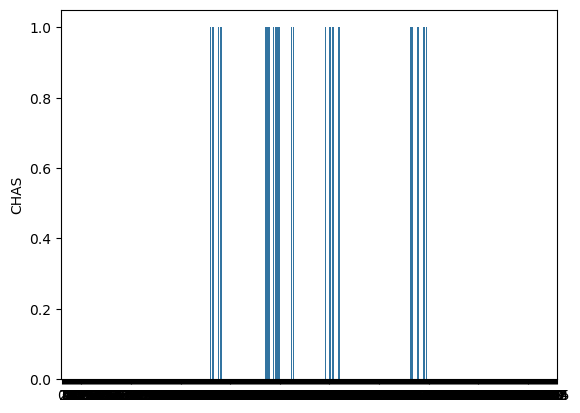

In [16]:
sns.barplot(data = boston_df['CHAS'])

In [18]:
boston_df.loc[(boston_df['AGE'] < 35 ), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] >= 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = '70 years and older'


In [19]:
y = boston_df.loc[boston_df['age_group'] == 'between 35 and 70 years', 'MEDV']
x = boston_df.loc[boston_df['age_group'] == '70 years and older', 'MEDV']
z = boston_df.loc[boston_df['age_group'] == '35 years and younger', 'MEDV']
df = pd.DataFrame( [x,y ,z] , index = [ '70 and older' , 'between 35 and 70 years' , '35 years and younger'])
df = df.fillna(0)
df.T


,70 and older,between 35 and 70 years,35 years and younger
1,21.6,0.0,0.0
7,27.1,0.0,0.0
8,16.5,0.0,0.0
9,18.9,0.0,0.0
10,15.0,0.0,0.0
...,...,...,...
349,0.0,0.0,26.6
352,0.0,0.0,18.6
354,0.0,0.0,18.2
355,0.0,0.0,20.6


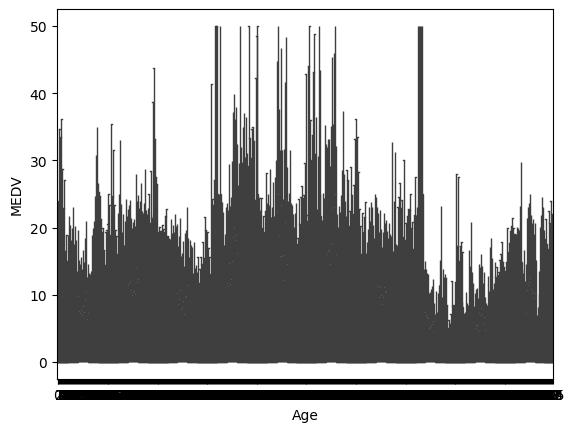

In [20]:
sns.boxplot(data = df)
pyplot.xlabel('Age')
pyplot.ylabel('MEDV')
pyplot.show()

Text(0, 0.5, ' Nitric oxide concentration in ppm')

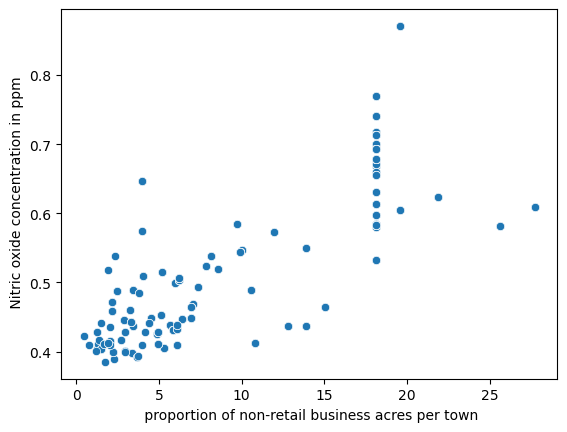

In [21]:
sns.scatterplot(data=boston_df, x='INDUS', y='NOX')
pyplot.xlabel(' proportion of non-retail business acres per town')
pyplot.ylabel(' Nitric oxide concentration in ppm')

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

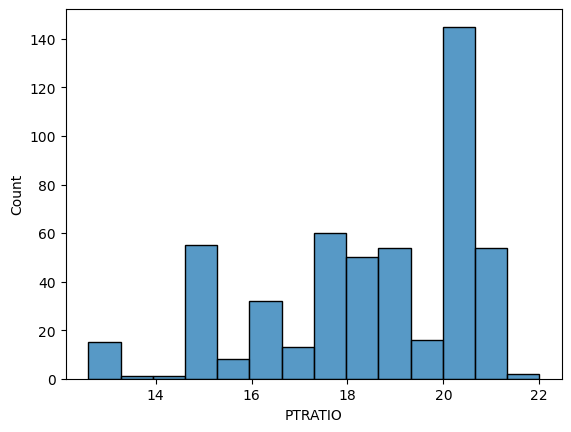

In [22]:
sns.histplot( data = boston_df['PTRATIO'])

## Task 3
##### Null Hypothesis
##### There is no significant  difference in median value of houses bounded by the Charles River
##### Alternate Hypothesis : There is no significant difference


In [23]:
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV'] 
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

In [26]:
scipy.stats.ttest_ind( chas_0 , chas_1 )

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

###### Here P value < 0.05 , Thus there is  significant difference in median value of houses bounded by the Charles River and we reject the null hypothesis


#### Null Hypothesis: There is no difference in the median values of houses (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE).
##### Alternative Hypothesis : There is a significant difference in the median values of houses (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE).

In [28]:
low_age = boston_df[boston_df['AGE'] < 20]['MEDV']
medium_age = boston_df[(boston_df['AGE'] >= 20) & (boston_df['AGE'] < 60)]['MEDV']
high_age = boston_df[boston_df['AGE'] >= 60]['MEDV']

In [29]:
scipy.stats.f_oneway(low_age, medium_age, high_age)

F_onewayResult(statistic=27.575973271815553, pvalue=4.326220568507029e-12)

##### Here P value < 0.05 , Thus We reject the null hypothesis and conclude that there is a significant difference in the median values of houses across the three age categories (low, medium, high).


##### Null Hypothesis: There is no linear relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

In [30]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

##### As P value < 0.05 we reject the null hypothesis and conclude that there is a significant linear relationship between the two variables.

#### Null Hypothesis : There is no relationship between the weighted distance to the five Boston employment centers and the median value of owner-occupied homes.
#### Alternate Hypothesis :There is a significant relationship between the weighted distance to the five Boston employment centers and the median value of owner-occupied homes.

In [31]:
x = boston_df['DIS']
y = boston_df['MEDV']
model = sm.OLS(y , x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):                   1.52e-146
Time:                        11:11:26   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""